In [1]:
symbol='BTCUSDT'

In [2]:
from binance.client import Client
import pandas as pd
import time

# Initialize the Binance client
api_key = "sytvkKKUmXPabC877r7MFv7rhibYAMoczrMdTse0OSB6dRyImx1G8yEInE889y00"
api_secret = "KYgkq441X5spXpdDoLELwlcoJ3k7uh9LeXGgf7aQvABSMZl42Py3OUIwFCqVgc6L"
client = Client(api_key, api_secret)

def fetch_ohlcv_batch(client, symbol, interval, start_time, limit=1000):
    """
    Fetch a batch of OHLCV data from Binance.
    """
    try:
        candles = client.get_klines(
            symbol=symbol,
            interval=interval,
            startTime=start_time,
            limit=limit
        )
        # Transform data into desired format
        ohlcv = [
            [int(c[0]), float(c[1]), float(c[2]), float(c[3]), float(c[4]), float(c[5])]
            for c in candles
        ]
        return ohlcv
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def fetch_historical_ohlcv(client, symbol, interval, start_time, limit=1000):
    """
    Fetch historical OHLCV data in batches from Binance.
    """
    all_data = []
    while True:
        data = fetch_ohlcv_batch(client, symbol, interval, start_time, limit)
        if data:
            # Append data to all_data
            all_data.extend(data)
            # Update `start_time` to the timestamp of the last fetched data point + 1 millisecond
            start_time = data[-1][0] + 1
            print(f"Fetched {len(data)} data points. Total so far: {len(all_data)}")
        else:
            print("No more data to fetch or an error occurred.")
            break

        # If the batch size is less than the limit, it means we reached the end of available data
        if len(data) < limit:
            print("Reached the end of available data.")
            break

        # To avoid rate limit issues, wait for a short while
        time.sleep(1)

    # Convert data to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# Usage example
if __name__ == "__main__":
    # Define parameters
    # symbol = 'BTCUSDT'        # Symbol to fetch (without '/')
    interval = Client.KLINE_INTERVAL_4HOUR  # Timeframe ('1m', '5m', '1h', '1d', etc.)
    start_time = int(pd.Timestamp("2007-01-01").timestamp() * 1000)  # Start date in milliseconds
    limit = 1000              # Max data points per batch

    # Fetch historical data
    df = fetch_historical_ohlcv(client, symbol, interval, start_time, limit)
    print(f"Total fetched data points: {len(df)}")
    print(df.head())

Fetched 1000 data points. Total so far: 1000
Fetched 1000 data points. Total so far: 2000
Fetched 1000 data points. Total so far: 3000
Fetched 1000 data points. Total so far: 4000
Fetched 1000 data points. Total so far: 5000
Fetched 1000 data points. Total so far: 6000
Fetched 1000 data points. Total so far: 7000
Fetched 1000 data points. Total so far: 8000
Fetched 1000 data points. Total so far: 9000
Fetched 1000 data points. Total so far: 10000
Fetched 1000 data points. Total so far: 11000
Fetched 1000 data points. Total so far: 12000
Fetched 1000 data points. Total so far: 13000
Fetched 1000 data points. Total so far: 14000
Fetched 1000 data points. Total so far: 15000
Fetched 1000 data points. Total so far: 16000
Fetched 269 data points. Total so far: 16269
Reached the end of available data.
Total fetched data points: 16269
            timestamp     open     high      low    close      volume
0 2017-08-17 04:00:00  4261.48  4349.99  4261.32  4349.99   82.088865
1 2017-08-17 08:00:0

In [3]:
df.head()

,timestamp,open,high,low,close,volume
0,2017-08-17 04:00:00,4261.48,4349.99,4261.32,4349.99,82.088865
1,2017-08-17 08:00:00,4333.32,4485.39,4333.32,4427.30,63.619882
2,2017-08-17 12:00:00,4436.06,4485.39,4333.42,4352.34,174.562001
3,2017-08-17 16:00:00,4352.33,4354.84,4200.74,4325.23,225.109716
4,2017-08-17 20:00:00,4307.56,4369.69,4258.56,4285.08,249.769913


In [4]:
df.tail()

,timestamp,open,high,low,close,volume
16264,2025-01-20 12:00:00,108239.19,108700.01,104480.00,104957.99,13711.24313
16265,2025-01-20 16:00:00,104957.99,107050.00,100333.00,103691.63,25962.90260
16266,2025-01-20 20:00:00,103691.64,104331.00,101701.01,102260.01,5700.34025
16267,2025-01-21 00:00:00,102260.00,103260.10,100119.04,102936.01,10133.69299
16268,2025-01-21 04:00:00,102936.01,102974.14,101903.80,101974.50,1597.68034


In [5]:
# Select all rows except the last one
df = df.iloc[:-1]

In [6]:
df.tail()

,timestamp,open,high,low,close,volume
16263,2025-01-20 08:00:00,107120.65,109193.23,107093.33,108239.19,9010.89785
16264,2025-01-20 12:00:00,108239.19,108700.01,104480.00,104957.99,13711.24313
16265,2025-01-20 16:00:00,104957.99,107050.00,100333.00,103691.63,25962.90260
16266,2025-01-20 20:00:00,103691.64,104331.00,101701.01,102260.01,5700.34025
16267,2025-01-21 00:00:00,102260.00,103260.10,100119.04,102936.01,10133.69299


In [7]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [8]:
df_daily=df.copy()

In [9]:
df_daily

,timestamp,open,high,low,close,volume
0,2017-08-17 04:00:00,4261.48,4349.99,4261.32,4349.99,82.088865
1,2017-08-17 08:00:00,4333.32,4485.39,4333.32,4427.30,63.619882
2,2017-08-17 12:00:00,4436.06,4485.39,4333.42,4352.34,174.562001
3,2017-08-17 16:00:00,4352.33,4354.84,4200.74,4325.23,225.109716
4,2017-08-17 20:00:00,4307.56,4369.69,4258.56,4285.08,249.769913
...,...,...,...,...,...,...
16263,2025-01-20 08:00:00,107120.65,109193.23,107093.33,108239.19,9010.897850
16264,2025-01-20 12:00:00,108239.19,108700.01,104480.00,104957.99,13711.243130
16265,2025-01-20 16:00:00,104957.99,107050.00,100333.00,103691.63,25962.902600
16266,2025-01-20 20:00:00,103691.64,104331.00,101701.01,102260.01,5700.340250


In [10]:
countrows=len(df_daily)
countrows

16268

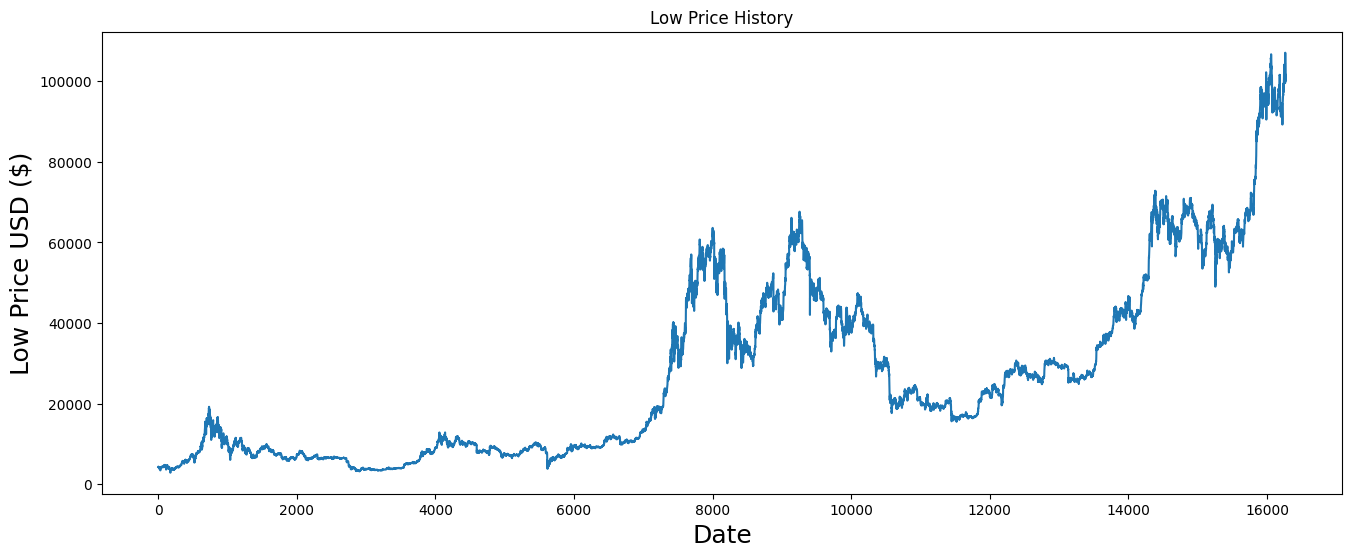

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.title('Low Price History')
plt.plot(df_daily['low'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Low Price USD ($)', fontsize=18)
plt.show()

In [12]:
import numpy as np
# Create a new dataframe with only the Low column 
data = df_daily.filter(['low'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

15455

In [13]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01385089],
       [0.01454136],
       [0.01454232],
       ...,
       [0.93516908],
       [0.94828817],
       [0.93311723]])

In [14]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01385089, 0.01454136, 0.01454232, 0.01326993, 0.01382442,
       0.01263575, 0.01359302, 0.01383679, 0.01320242, 0.01149542,
       0.01075767, 0.01215309, 0.01070435, 0.00990637, 0.01066292,
       0.01089797, 0.01183845, 0.01176681, 0.01212346, 0.01165768,
       0.01195238, 0.0122232 , 0.01200781, 0.01171886, 0.01089797,
       0.01134495, 0.01049893, 0.01056616, 0.01086536, 0.00836211,
       0.00559091, 0.00894815, 0.00930038, 0.00993965, 0.01080811,
       0.01147806, 0.01168357, 0.01189148, 0.01278958, 0.01233751,
       0.01201423, 0.01216009, 0.01221169, 0.01278334, 0.01265225,
       0.01305397, 0.01319734, 0.01418107, 0.01391016, 0.01420974,
       0.01384907, 0.01406944, 0.01371817, 0.01354085, 0.01376573,
       0.01384667, 0.01346557, 0.01338185, 0.01402044, 0.01436481])]
[0.014158726146192523]

[array([0.01385089, 0.01454136, 0.01454232, 0.01326993, 0.01382442,
       0.01263575, 0.01359302, 0.01383679, 0.01320242, 0.01149542,
       0.01075767, 0.01215309, 0.0

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2025-01-21 05:19:13.389749: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-21 05:19:13.393359: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-21 05:19:13.405937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737436753.426444 3312698 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737436753.432582 3312698 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-21 05:19:13.453904: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

15395/15395 ━━━━━━━━━━━━━━━━━━━━ 341s 22ms/step - loss: 6.2169e-04


In [16]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
# from keras.callbacks import EarlyStopping, LearningRateScheduler
# from keras.optimizers import Adam

# # Build the LSTM model with improvements
# model = Sequential()

# # Bidirectional LSTM layer
# model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
# model.add(BatchNormalization())  # Batch normalization

# model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.2))  # Dropout layer

# # Dense layer with 25 neurons
# model.add(Dense(25))

# # Output layer with 1 neuron (regression output)
# model.add(Dense(1))

# # Compile the model with a custom optimizer
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# # Implement EarlyStopping and LearningRateScheduler callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = LearningRateScheduler(lambda epoch, lr: lr * 0.1 if epoch % 10 == 0 and epoch != 0 else lr)

# # Train the model
# model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2, 
#           callbacks=[early_stopping, lr_scheduler])


In [17]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]  # Actual values for comparison
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scale the predictions

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(predictions - y_test))

# Calculate MSE
mse = np.mean((predictions - y_test) ** 2)

# Calculate R²
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - predictions) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Calculate MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Print all metrics
print(f"RMSE: {round(rmse, 2)}")
print(f"MAE: {round(mae, 2)}")
print(f"MSE: {round(mse, 2)}")
print(f"R²: {round(r2, 2)}")
print(f"MAPE: {round(mape, 2)}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
RMSE: 5921.55
MAE: 5544.8
MSE: 35064804.06
R²: 0.87
MAPE: 6.63%


/tmp/ipykernel_3312698/3683683532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


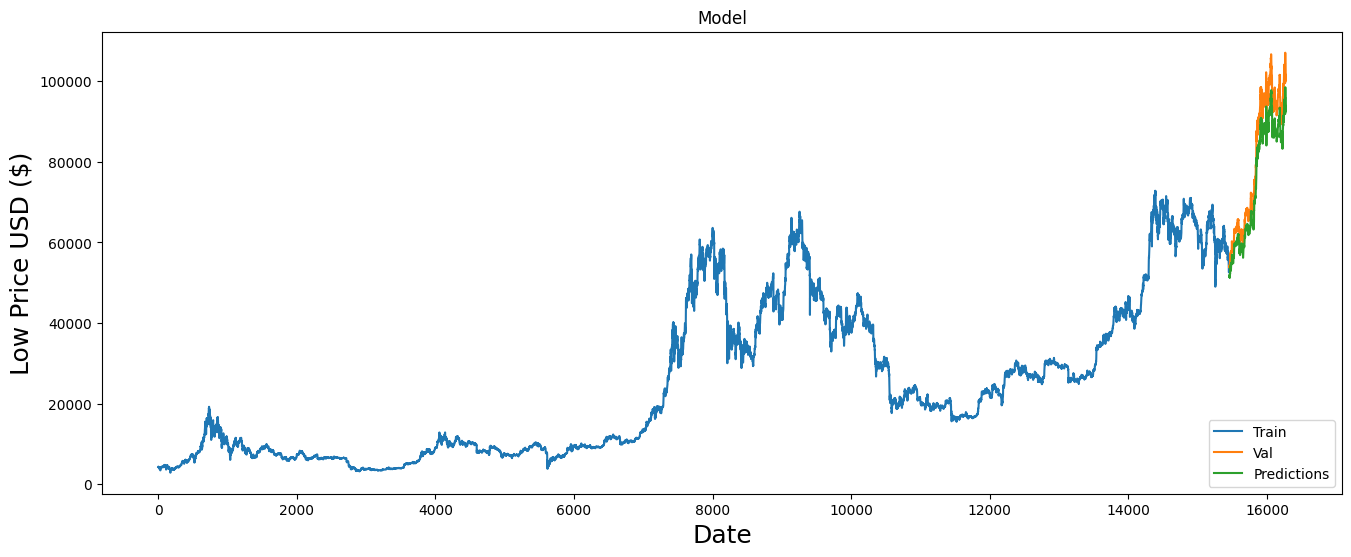

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Low Price USD ($)', fontsize=18)
plt.plot(train['low'])
plt.plot(valid[['low', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
# Show the valid and predicted prices
valid

,low,Predictions
15455,54000.00,51816.164062
15456,53814.01,51534.000000
15457,53964.00,51362.953125
15458,54261.10,51472.039062
15459,54356.00,51709.363281
...,...,...
16263,107093.33,93879.593750
16264,104480.00,98523.414062
16265,100333.00,95768.976562
16266,101701.01,92373.250000


In [20]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from datetime import datetime, timedelta

# def predict_next_n_days(model, last_sequence, scaler, start_date=None, n_days=5):
#     """
#     Predict the next n days of prices using the trained model
    
#     Parameters:
#     model: trained LSTM model
#     last_sequence: last 60 days of scaled data
#     scaler: fitted MinMaxScaler object
#     start_date: starting date for predictions (defaults to today if None)
#     n_days: number of days to predict (default 5)
    
#     Returns:
#     DataFrame with dates and predicted prices
#     """
#     # Make a copy of the last sequence
#     curr_sequence = last_sequence.copy()
    
#     # List to store predictions
#     future_predictions = []
    
#     # Use provided start date or today's date
#     if start_date is None:
#         start_date = pd.Timestamp.today()  # Current date
#     else:
#         start_date = pd.to_datetime(start_date)
    
#     # Predict n days
#     for i in range(n_days):
#         # Get prediction for next day
#         curr_sequence_reshaped = curr_sequence.reshape((1, curr_sequence.shape[0], 1))
#         predicted_price = model.predict(curr_sequence_reshaped)
        
#         # Store the prediction
#         future_predictions.append(predicted_price[0, 0])
        
#         # Update sequence by removing first element and adding the predicted value
#         curr_sequence = np.roll(curr_sequence, -1)
#         curr_sequence[-1] = predicted_price
    
#     # Create dates for predictions starting from the day after start_date
#     future_dates = [start_date + timedelta(days=x+1) for x in range(n_days)]
    
#     # Convert predictions back to original scale
#     predictions_unscaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    
#     # Create DataFrame with predictions
#     future_predictions_df = pd.DataFrame(
#         predictions_unscaled,
#         index=future_dates,
#         columns=['Predicted_Price']
#     )
    
#     return future_predictions_df

# # Usage example:
# # Get the last x days of scaled data
# last_x_days = scaled_data[-countrows:]

# # Reshape the data
# last_x_days_scaled = last_x_days.reshape((countrows, 1))

# # Make predictions for next 5 days starting from January 12, 2025
# future_predictions = predict_next_n_days(
#     model=model,
#     last_sequence=last_x_days_scaled,
#     scaler=scaler,
#     start_date= "01-12-2025",
#     n_days=5
# )

# # Print the predictions
# print("\nPredicted prices for the next 5 days:")
# print(future_predictions)

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

def predict_next_n_hours(model, last_sequence, scaler, start_date=None, n_predictions=5):
    """
    Predict the next n predictions at 4-hour intervals (4, 8, 12, 16, 20 hours ahead) using the trained model
    
    Parameters:
    model: trained LSTM model
    last_sequence: last sequence of scaled data
    scaler: fitted MinMaxScaler object
    start_date: starting date for predictions (defaults to now if None)
    n_predictions: number of predictions to make (default 5)
    
    Returns:
    DataFrame with datetime indices and predicted prices
    """
    # Make a copy of the last sequence
    curr_sequence = last_sequence.copy()
    
    # List to store predictions
    future_predictions = []
    
    # Use provided start date or current date
    if start_date is None:
        start_date = pd.Timestamp.today()  # Current date
    else:
        start_date = pd.to_datetime(start_date)
    
    # Predict the next n_predictions at 4-hour intervals (4, 8, 12, 16, 20)
    for i in range(n_predictions):
        # Get prediction for the next 4-hour interval
        curr_sequence_reshaped = curr_sequence.reshape((1, curr_sequence.shape[0], 1))
        predicted_price = model.predict(curr_sequence_reshaped)
        
        # Store the prediction
        future_predictions.append(predicted_price[0, 0])
        
        # Update sequence by removing first element and adding the predicted value
        curr_sequence = np.roll(curr_sequence, -1)
        curr_sequence[-1] = predicted_price
    
    # Create timestamps for predictions (4, 8, 12, 16, 20 hours ahead)
    future_dates = [start_date + timedelta(hours=4*(i+1)) for i in range(n_predictions)]
    
    # Convert predictions back to the original scale
    predictions_unscaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    
    # Create DataFrame with predictions
    future_predictions_df = pd.DataFrame(
        predictions_unscaled,
        index=future_dates,
        columns=['Predicted_Price']
    )
    
    return future_predictions_df

# Usage example:
# Get the last x hours of scaled data (this could be in the form of the last 60 observations, for example)
last_x_hours = scaled_data[-countrows:]

# Reshape the data
last_x_hours_scaled = last_x_hours.reshape((countrows, 1))

# Make predictions for the next 5 intervals (4, 8, 12, 16, 20 hours)
future_predictions = predict_next_n_hours(
    model=model,
    last_sequence=last_x_hours_scaled,
    scaler=scaler,
    start_date=datetime.today(),
    n_predictions=5
)

# Print the predictions
print("\nPredicted prices for the next 5 time intervals (4, 8, 12, 16, 20 hours):")
print(future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Predicted prices for the next 5 time intervals (4, 8, 12, 16, 20 hours):
                            Predicted_Price
2025-01-21 09:27:37.528086     92461.281250
2025-01-21 13:27:37.528086     86060.554688
2025-01-21 17:27:37.528086     81118.898438
2025-01-21 21:27:37.528086     77285.171875
2025-01-22 01:27:37.528086     74223.648438


In [22]:
# Define the Mean Absolute Error (MAE)
MAE = round(mae, 2)  # Replace with the actual MAE value if known

# Add Max and Min columns
future_predictions['Max'] = future_predictions['Predicted_Price'] + MAE
future_predictions['Min'] = future_predictions['Predicted_Price'] - MAE

# Print the updated DataFrame
print("\nPredicted prices with Max and Min for the next 5 days:")
print(future_predictions)


Predicted prices with Max and Min for the next 5 days:
                            Predicted_Price           Max           Min
2025-01-21 09:27:37.528086     92461.281250  98006.078125  86916.484375
2025-01-21 13:27:37.528086     86060.554688  91605.351562  80515.757812
2025-01-21 17:27:37.528086     81118.898438  86663.695312  75574.101562
2025-01-21 21:27:37.528086     77285.171875  82829.968750  71740.375000
2025-01-22 01:27:37.528086     74223.648438  79768.445312  68678.851562
